# Artist_info Survey

### Import

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Config

In [2]:
CONFIG = {'font_size' : 10}

### Load CSV

In [3]:
artists_info = pd.DataFrame(pd.read_csv('artists_info.csv'))
artists_info.head()

,name,years,genre,nationality
0,Amedeo Modigliani,1884 - 1920,Expressionism,Italian
1,Vasiliy Kandinskiy,1866 - 1944,"Expressionism,Abstractionism",Russian
2,Diego Rivera,1886 - 1957,"Social Realism,Muralism",Mexican
3,Claude Monet,1840 - 1926,Impressionism,French
4,Rene Magritte,1898 - 1967,"Surrealism,Impressionism",Belgian


### Pre-Processing

In [4]:
artists_info['genre'] = [g.split(',') for g in artists_info['genre']]

### Describe

In [5]:
artists_info.describe()

,name,years,genre,nationality
count,50,50,50,50
unique,50,50,31,17
top,Amedeo Modigliani,1884 - 1920,[Impressionism],French
freq,1,1,4,13


### Make Unique Key

In [6]:
genre_key = []
for g in artists_info['genre']:
    for gg in g:
        genre_key.append(gg)
genre_key = set(genre_key)
print(genre_key, ' total is ', len(genre_key))

{'Suprematism', 'Impressionism', 'Mannerism', 'Realism', 'Proto Renaissance', 'Abstractionism', 'Symbolism', 'Romanticism', 'Post-Impressionism', 'Muralism', 'Art Nouveau', 'Baroque', 'Surrealism', 'Pop Art', 'Early Renaissance', 'Social Realism', 'Abstract Expressionism', 'Cubism', 'Primitivism', 'Expressionism', 'Byzantine Art', 'High Renaissance', 'Northern Renaissance', 'Neoplasticism'}  total is  24


### Render Plot
X axis : artist
Y axis : genre
Label : nationality

Label의 경우, 같은 국적을 가진 화가끼리 같은 색상으로 배치.
y방향 점선으로 각 국적 구분(즉, 점선 사이에 있는 화가들은 같은 국가)

다수의 nationality를 가진 화가도 있으나 표현방법이 떠오르지 않아 고유 라벨로 취급하였음.

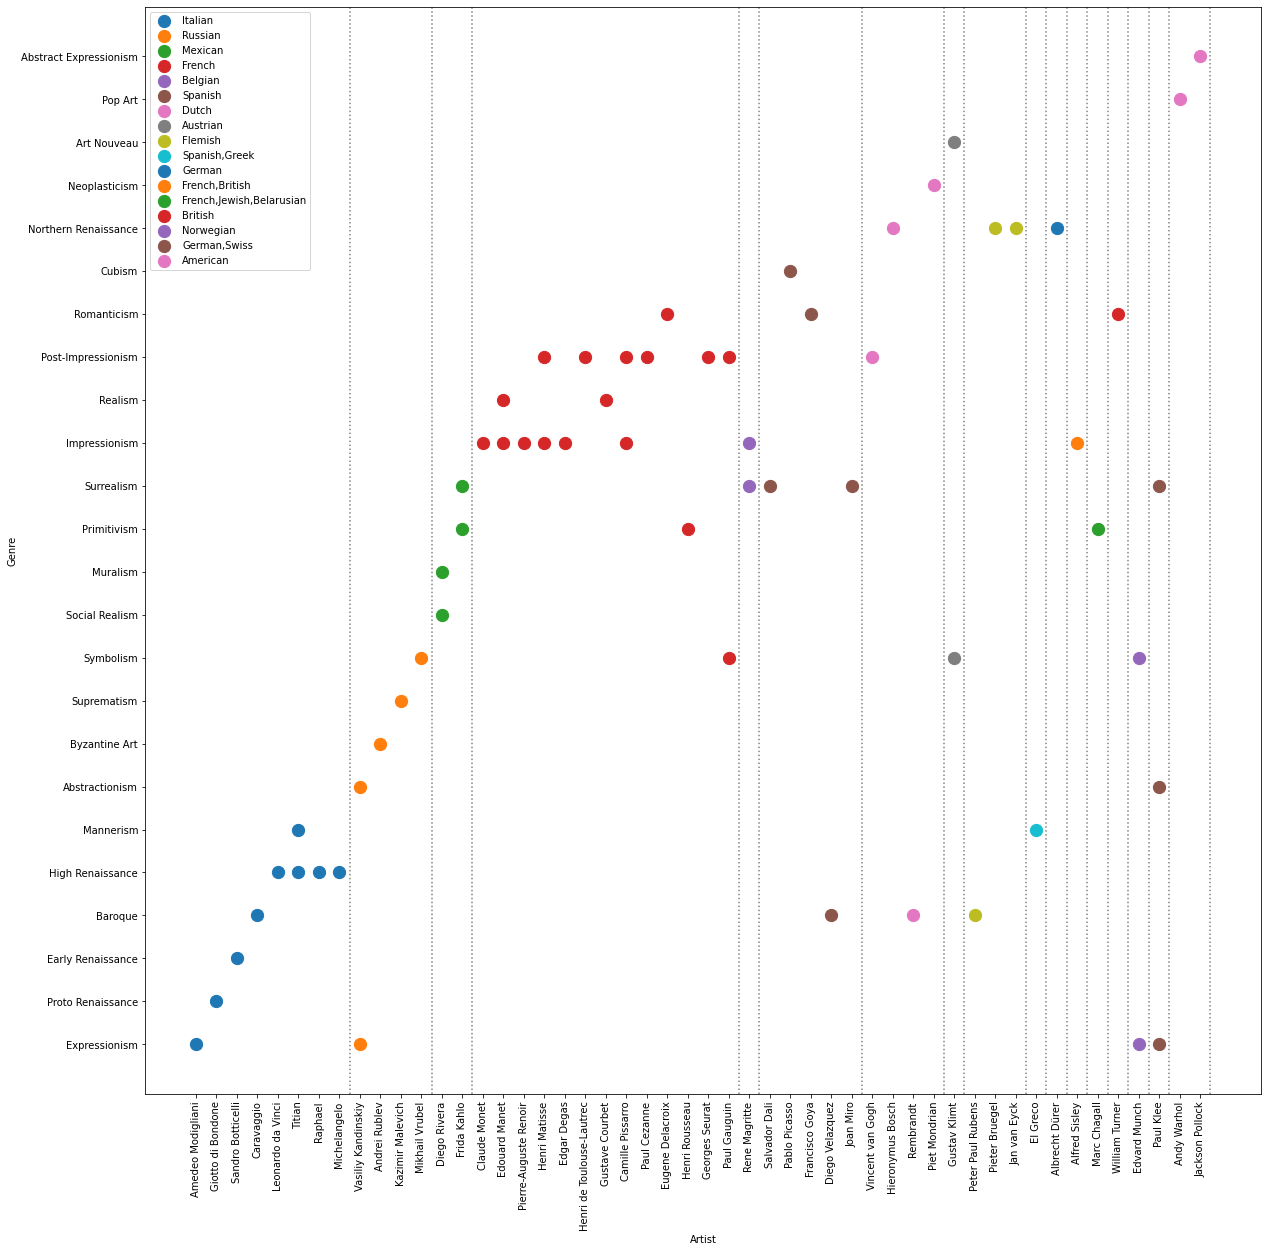

In [7]:

fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
plt.xticks(rotation=90)
plt.xlabel('Artist')
plt.ylabel('Genre')
plt.rc('xtick', labelsize=CONFIG['font_size'])
plt.rc('ytick', labelsize=CONFIG['font_size'])
nationality_key = artists_info['nationality'].unique()
vl_pos = 0
for nationality in nationality_key:
    artists_info_sub = artists_info[artists_info['nationality']==nationality]
    vl_pos += artists_info_sub['name'].count()
    ax.axvline(vl_pos - 0.5, color='gray', linestyle=':')
    names = [row[1]['name'] for row in artists_info_sub.iterrows() for _ in range(len(row[1]['genre']))]
    genres = [g for row in artists_info_sub.iterrows() for g in row[1]['genre']]
    ax.scatter(x=names,
               y=genres, s = 150, label=nationality)
               
ax.legend()    